# **BUSQUEDA EN AMPLITUD EN UNA MATRIZ DE ADYACENCIA**

## **Función BFS para recorrer una MA**

In [1]:
import numpy as np
import graphviz as gv

In [2]:
def bfs_am(G, s):
  n = len(G)
  visited = [False]*n
  path = [-1]*n # parent
  queue = [s]
  visited[s] = True

  while queue:
    u = queue.pop(0)
    for v in range(n):
      if G[u, v] == 1 and not visited[v]:
        visited[v] = True
        path[v] = u
        queue.append(v)

  return path

Generamos una MA segun el siguiente texto:

In [3]:
%%file 01a.ma
0 1 0 0 1 0 0 0
1 0 0 1 0 1 1 0
0 0 0 0 1 1 1 0
0 1 0 0 0 0 0 1
1 0 1 0 0 0 1 1
0 1 1 0 0 0 0 0
0 1 1 0 1 0 0 0
0 0 0 1 1 0 0 0

Writing 01a.ma


Cargamos la MA generada desde el archivo 01a.ma a un arreglo tipo numpy en la variable G1

In [4]:
G1 = np.loadtxt("01a.ma", dtype=int)

Creamos una función para dibujar el grafo utilizando la libreria **gv**, indicando si ser un grafo dirigido o no.  Si le pasamos una lista con una ruta, debera colorear dicha ruta (path).

In [5]:
def drawG_am(G, directed=False, path=None):
  if directed:
    graph = gv.Digraph("di-anyname")
  else:
    graph = gv.Graph("anyname")
  n = len(G)
  for i in range(n):
    for j in range(0 if directed else i, n):
      if G[i, j] == 1:
        if path != None and (path[i] == j or path[j] == i):
          graph.edge(str(i), str(j), color="orange")
        else:
          graph.edge(str(i), str(j))
  return graph

Visualizamos el grafo no dirigido del arreglo G1

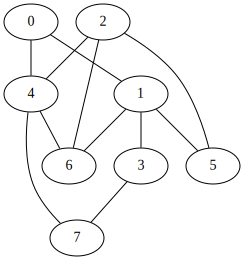

In [6]:
drawG_am(G1)

Hacemos una busqueda en amplitud (BFS) del grafo no dirigido G1 partiendo del nodo 5 (retorna una pila de nodos visitados en la variable path)

In [8]:
path = bfs_am(G1, 5)
path

[1, 5, 5, 1, 2, -1, 1, 3]

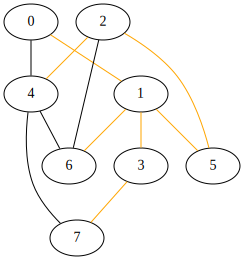

In [9]:
drawG_am(G1, path=path)